# Premier League Team Analysis (2000-2022)

#### This dataset contains the English Premier League standings from 2000/01 season to 2021/22 season. It provides detailed information about team performance across multiple metrics including:
    Season Details: The year and position of each team in the standings.
    Match Performance: Games played, wins, draws, losses, and corresponding statistics such as goals scored, goals conceded, and goal difference.
    Points and Outcomes: Total points accumulated by each team and their season outcome (e.g., qualification for European competitions or relegation).


## Importing necessary libraries

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing the Dataset

In [204]:
#reading the dataset

df = pd.read_csv('EPL-Standings-2000-2022.csv')
df.head(5)

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


## Dataset Info

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


## Summary stats of the Dataset

In [211]:
df.describe()

,Pos,Pld,W,D,L,GF,GA,GD,Pts
count,440.000000,440.0,440.000000,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000
mean,10.500000,38.0,14.261364,9.477273,14.261364,50.863636,50.863636,0.00000,52.240909
std,5.772845,0.0,5.987638,2.856385,5.548080,15.778205,12.893450,26.02627,17.097234
min,1.000000,38.0,1.000000,2.000000,0.000000,20.000000,15.000000,-69.00000,11.000000
25%,5.750000,38.0,10.000000,7.000000,10.000000,40.000000,42.000000,-19.00000,40.750000
50%,10.500000,38.0,13.000000,9.000000,15.000000,47.000000,51.000000,-6.00000,48.000000
75%,15.250000,38.0,18.000000,11.000000,18.000000,60.000000,59.000000,16.00000,63.250000
max,20.000000,38.0,32.000000,17.000000,29.000000,106.000000,89.000000,79.00000,100.000000


## Cleaning the Dataset

#### This step will consist of checking for null values, standardizing column names and rows, and validating data consistency.

In [214]:
df.columns

Index(['Season', 'Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'Qualification or relegation'],
      dtype='object')

In [218]:
## standardizing the column names by making all the columns to lower case
df.columns = df.columns.str.lower()
df

,season,pos,team,pld,w,d,l,gf,ga,gd,pts,qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]
...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39,Not Applicable
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,38,Not Applicable
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship


In [220]:
##replacing any spaces by underscore 
df.columns = df.columns.str.replace(' ', '_')

In [222]:
## this is how the dataset looks after standardizing the column names 
df.head()

,season,pos,team,pld,w,d,l,gf,ga,gd,pts,qualification_or_relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


In [224]:
# Renaming column names to make them more intuitive and easier to understand.
# This ensures that even individuals unfamiliar with the league or the sport can easily interpret what the dataset represents.

df.rename(
        columns = {
            'pos': 'position',
            'pld': 'games_played',
            'w': 'wins',
            'd': 'draw',
            'l': 'losses',
            'gf': 'goals_for',
            'ga': 'goals_against',
            'gd': 'goal_difference',
            'pts': 'points',
            'qualification_or_relegation': 'season_outcome'
        },
    inplace = True
)

In [228]:
df.head()

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


In [230]:
# checking for null values
df.isnull().sum()

season             0
position           0
team               0
games_played       0
wins               0
draw               0
losses             0
goals_for          0
goals_against      0
goal_difference    0
points             0
season_outcome     0
dtype: int64

In [232]:
# checking for duplicate values
df.duplicated().sum()

0

In [242]:
# Checking unique values in the 'Non-numeric' columns. 
# This helps identify inconsistencies or missing values that may be represented differently, such as 'Not Available'.
#df['team'].unique()
df['season_outcome'].unique()

array(['Qualification for the Champions League first group stage',
       'Qualification for the Champions League third qualifying round[a]',
       'Qualification for the UEFA Cup first round[a]', 'Not Applicable',
       'Qualification for the Intertoto Cup third round',
       'Relegation to the Football League First Division',
       'Qualification for the Champions League third qualifying round',
       'Qualification for the UEFA Cup first round[b]',
       'Qualification for the UEFA Cup first round[c]',
       'Qualification for the Intertoto Cup second round',
       'Qualification for the UEFA Cup qualifying round[a]Relegation to the Football League First Division',
       'Qualification for the Champions League group stage',
       'Qualification for the UEFA Cup qualifying round[c]',
       'Relegation to Football League First Division',
       'Qualification for the UEFA Cup first round',
       'Relegation to the Football League Championship',
       'Qualification for th

In [246]:
## validating data consistency

inconsistent_row = df[df['wins'] + df['losses'] + df['draw'] != df['games_played']]
inconsistent_row

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome


In [248]:
inconsistent_gd = df[df['goals_for'] - df['goals_against'] != df['goal_difference']]
inconsistent_gd

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome


## Data Transformation:

#### In this step, new features(columns) are derived for additional analysis. We will also be categorizing season_outcome table. Instead of editing the season_outcome column we will be creating a new column with same information, which will help in preserving the original data while working with a clean and standarized version for analysis.

In [255]:
df['win_percentage'] = ((df['wins'] / df['games_played']) * 100).round(2)
df.head(5)

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome,win_percentage
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,63.16
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,52.63
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,52.63
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],52.63
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],52.63


In [257]:
df['loss_percentage'] = ((df['losses'] / df['games_played']) * 100).round(2)
df.head(5)

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome,win_percentage,loss_percentage
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,63.16,15.79
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,52.63,21.05
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,52.63,23.68
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],52.63,26.32
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],52.63,31.58


In [259]:
df['draw_percentage'] = ((df['draw'] / df['games_played']) * 100).round(2)
df.head(5)

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome,win_percentage,loss_percentage,draw_percentage
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,63.16,15.79,21.05
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,52.63,21.05,26.32
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,52.63,23.68,23.68
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],52.63,26.32,21.05
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],52.63,31.58,15.79


In [261]:
df.head()

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome,win_percentage,loss_percentage,draw_percentage
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,63.16,15.79,21.05
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,52.63,21.05,26.32
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,52.63,23.68,23.68
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],52.63,26.32,21.05
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],52.63,31.58,15.79


In [263]:
df['goals_per_game'] = (df['goals_for'] / df['games_played']).round(2)
df['goals_conceded_per_game'] = (df['goals_against'] / df['games_played']).round(2)

In [265]:
df

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome,win_percentage,loss_percentage,draw_percentage,goals_per_game,goals_conceded_per_game
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,63.16,15.79,21.05,2.08,0.82
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,52.63,21.05,26.32,1.66,1.00
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,52.63,23.68,23.68,1.87,1.03
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],52.63,26.32,21.05,1.68,1.13
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],52.63,31.58,15.79,1.50,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39,Not Applicable,28.95,55.26,15.79,1.13,1.74
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,38,Not Applicable,23.68,47.37,28.95,1.11,2.08
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship,18.42,44.74,36.84,0.89,1.39
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship,15.79,71.05,13.16,0.89,2.03


In [267]:
df['points_per_game'] = (df['points'] / df['games_played']).round(2)

In [269]:
df

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome,win_percentage,loss_percentage,draw_percentage,goals_per_game,goals_conceded_per_game,points_per_game
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,63.16,15.79,21.05,2.08,0.82,2.11
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,52.63,21.05,26.32,1.66,1.00,1.84
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,52.63,23.68,23.68,1.87,1.03,1.82
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],52.63,26.32,21.05,1.68,1.13,1.79
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],52.63,31.58,15.79,1.50,1.11,1.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39,Not Applicable,28.95,55.26,15.79,1.13,1.74,1.03
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,38,Not Applicable,23.68,47.37,28.95,1.11,2.08,1.00
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship,18.42,44.74,36.84,0.89,1.39,0.92
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship,15.79,71.05,13.16,0.89,2.03,0.61


In [271]:
df['cleaned_season_outcome'] = df['season_outcome']
df

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome,win_percentage,loss_percentage,draw_percentage,goals_per_game,goals_conceded_per_game,points_per_game,cleaned_season_outcome
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,63.16,15.79,21.05,2.08,0.82,2.11,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,52.63,21.05,26.32,1.66,1.00,1.84,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,52.63,23.68,23.68,1.87,1.03,1.82,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],52.63,26.32,21.05,1.68,1.13,1.79,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],52.63,31.58,15.79,1.50,1.11,1.74,Qualification for the UEFA Cup first round[a]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39,Not Applicable,28.95,55.26,15.79,1.13,1.74,1.03,Not Applicable
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,38,Not Applicable,23.68,47.37,28.95,1.11,2.08,1.00,Not Applicable
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship,18.42,44.74,36.84,0.89,1.39,0.92,Relegation to the EFL Championship
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship,15.79,71.05,13.16,0.89,2.03,0.61,Relegation to the EFL Championship


In [273]:
df['cleaned_season_outcome'].unique()

array(['Qualification for the Champions League first group stage',
       'Qualification for the Champions League third qualifying round[a]',
       'Qualification for the UEFA Cup first round[a]', 'Not Applicable',
       'Qualification for the Intertoto Cup third round',
       'Relegation to the Football League First Division',
       'Qualification for the Champions League third qualifying round',
       'Qualification for the UEFA Cup first round[b]',
       'Qualification for the UEFA Cup first round[c]',
       'Qualification for the Intertoto Cup second round',
       'Qualification for the UEFA Cup qualifying round[a]Relegation to the Football League First Division',
       'Qualification for the Champions League group stage',
       'Qualification for the UEFA Cup qualifying round[c]',
       'Relegation to Football League First Division',
       'Qualification for the UEFA Cup first round',
       'Relegation to the Football League Championship',
       'Qualification for th

##### Renaming the complex season outcomes to simplified categories to narrow down the categories.
##### The simplified categories make it easier to analyze the outcomes, grouping related values together. It will also be helpful in visualization purposes.
##### For example, all Champions League qualifications are now under "Qualification for Champions League", and similarly for other categories like Europa League, Relegation, and others.
##### The original 'season_outcome' column remains unchanged, so the detailed information is still available if needed.


In [293]:
# Mapping the complex season outcomes to simplified categories
df['cleaned_season_outcome'] = df['cleaned_season_outcome'].replace({
    # Qualification for Champions League
    'Qualification for the Champions League group stage': 'Qualification for Champions League',
    'Qualification for the Champions League first group stage': 'Qualification for Champions League',
    'Qualification for the Champions League group stage[a]': 'Qualification for Champions League',
    'Qualification for the Champions League group stage[b]': 'Qualification for Champions League',
    'Qualification for the Champions League third qualifying round[a]': 'Qualification for Champions League',
    'Qualification for the Champions League third qualifying round': 'Qualification for Champions League',
    'Qualification for the Champions League first qualifying round': 'Qualification for Champions League',
    'Qualification for the Champions League play-off round': 'Qualification for Champions League',
    
    # Qualification for Europa League (UEFA Cup)
    'Qualification for the Europa League group stage': 'Qualification for Europa League (UEFA Cup)',
    'Qualification for the Europa League play-off round': 'Qualification for Europa League',
    'Qualification for the Europa League third qualifying round': 'Qualification for Europa League',
    'Qualification for the Europa League second qualifying round[a]': 'Qualification for Europa League',
    'Qualification for the Europa League first qualifying round[b]': 'Qualification for Europa League',
    'Qualification for the Europa League play-off round[a]': 'Qualification for Europa League',
    'Qualification for the Europa League group stage[a]': 'Qualification for Europa League',
    'Qualification for the Europa League group stage[b]': 'Qualification for Europa League',
    'Qualification for the Europa League third qualifying round[a]': 'Qualification for Europa League',
    'Qualification for the Europa League third qualifying round[b]': 'Qualification for Europa League',
    'Qualification for the UEFA Cup first round': 'Qualification for Europa League',
    'Qualification for the UEFA Cup first round[a]': 'Qualification for Europa League',
    'Qualification for the UEFA Cup first round[b]': 'Qualification for Europa League',
    'Qualification for the UEFA Cup first round[c]': 'Qualification for Europa League',
    'Qualification for the UEFA Cup qualifying round[a]': 'Qualification for Europa League',
    'Qualification for the UEFA Cup qualifying round[c]': 'Qualification for Europa League',
     'Qualification for the UEFA Cup qualifying round' : 'Qualification for Europa League (UEFA Cup)',
    'Qualification for the UEFA Cup first qualifying round' : 'Qualification for Europa League (UEFA Cup)',
    'Qualification for the Europa League first qualifying round' : 'Qualification for Europa League (UEFA Cup)',
    'Qualification for the Europa League second qualifying round' : 'Qualification for Europa League (UEFA Cup)',
    
    # Qualification for Europa Conference League
    'Qualification for the Europa Conference League play-off round[a]': 'Qualification for Europa Conference League',
    'Qualification for the Europa Conference League play-off round[b]': 'Qualification for Europa Conference League',
    'Qualification for the Europa Conference League play-off round' : 'Qualification for Europa Conference League',
    
    # Qualification for Intertoto Cup
    'Qualification for the Intertoto Cup second round': 'Qualification for Intertoto Cup',
    'Qualification for the Intertoto Cup third round': 'Qualification for Intertoto Cup',
    'Qualification for the Intertoto Cup third round[b]': 'Qualification for Intertoto Cup',
    
    # Relegation
    'Relegation to the Football League First Division': 'Relegation',
    'Relegation to Football League First Division': 'Relegation',
    'Relegation to the Football League Championship': 'Relegation',
    'Relegation to the EFL Championship': 'Relegation',
    'Qualification for the Europa League group stage[b]Relegation to the Football League Championship': 'Relegation',
    'Qualification for the Europa League play-off round[a]Relegation to the Football League Championship': 'Relegation',
    'Qualification for the UEFA Cup qualifying round[a]Relegation to the Football League First Division': 'Relegation',
    'Qualification for the UEFA Cup qualifying round and Relegation to the EFL Championship': 'Relegation',
    'Qualification for the Europa League play-off round and Relegation to the EFL Championship' : 'Relegation',
    'Qualification for the Europa League group stage and Relegation to the EFL Championship' : 'Relegation',
    
    # Not Applicable
    'Not Applicable': 'Not Applicable'
})

# Verify the changes
print(df['cleaned_season_outcome'].unique())


['Qualification for Champions League' 'Qualification for Europa League'
 'Not Applicable' 'Qualification for Intertoto Cup' 'Relegation'
 'Qualification for Europa League (UEFA Cup)'
 'Qualification for Europa Conference League']


In [299]:
df['cleaned_season_outcome'].unique()

array(['Qualification for Champions League',
       'Qualification for Europa League', 'Not Applicable',
       'Qualification for Intertoto Cup', 'Relegation',
       'Qualification for Europa League (UEFA Cup)',
       'Qualification for Europa Conference League'], dtype=object)

In [301]:
df

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome,win_percentage,loss_percentage,draw_percentage,goals_per_game,goals_conceded_per_game,points_per_game,cleaned_season_outcome
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,63.16,15.79,21.05,2.08,0.82,2.11,Qualification for Champions League
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,52.63,21.05,26.32,1.66,1.00,1.84,Qualification for Champions League
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,52.63,23.68,23.68,1.87,1.03,1.82,Qualification for Champions League
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],52.63,26.32,21.05,1.68,1.13,1.79,Qualification for Europa League
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],52.63,31.58,15.79,1.50,1.11,1.74,Qualification for Europa League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39,Not Applicable,28.95,55.26,15.79,1.13,1.74,1.03,Not Applicable
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,38,Not Applicable,23.68,47.37,28.95,1.11,2.08,1.00,Not Applicable
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship,18.42,44.74,36.84,0.89,1.39,0.92,Relegation
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship,15.79,71.05,13.16,0.89,2.03,0.61,Relegation


In [305]:
#arranging column position

columns = [
    'season', 'position', 'team', 'games_played', 'wins', 'draw', 'losses', 
    'goals_for', 'goals_against', 'goal_difference', 'points', 'season_outcome', 'cleaned_season_outcome',
    'win_percentage', 'loss_percentage', 'draw_percentage', 'goals_per_game', 
    'goals_conceded_per_game', 'points_per_game'
]
df = df[columns]


In [307]:
df

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome,cleaned_season_outcome,win_percentage,loss_percentage,draw_percentage,goals_per_game,goals_conceded_per_game,points_per_game
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,Qualification for Champions League,63.16,15.79,21.05,2.08,0.82,2.11
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,Qualification for Champions League,52.63,21.05,26.32,1.66,1.00,1.84
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,Qualification for Champions League,52.63,23.68,23.68,1.87,1.03,1.82
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],Qualification for Europa League,52.63,26.32,21.05,1.68,1.13,1.79
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],Qualification for Europa League,52.63,31.58,15.79,1.50,1.11,1.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39,Not Applicable,Not Applicable,28.95,55.26,15.79,1.13,1.74,1.03
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,38,Not Applicable,Not Applicable,23.68,47.37,28.95,1.11,2.08,1.00
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship,Relegation,18.42,44.74,36.84,0.89,1.39,0.92
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship,Relegation,15.79,71.05,13.16,0.89,2.03,0.61


In [316]:
# Save cleaned data to CSV
df.to_csv('cleaned_epl_data.csv', index=False)

print("Cleaned data exported successfully!")

Cleaned data exported successfully!


## Advance Data Analysis

In [320]:
df2 = pd.read_csv('cleaned_epl_data.csv')
df2.head()

,season,position,team,games_played,wins,draw,losses,goals_for,goals_against,goal_difference,points,season_outcome,cleaned_season_outcome,win_percentage,loss_percentage,draw_percentage,goals_per_game,goals_conceded_per_game,points_per_game
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...,Qualification for Champions League,63.16,15.79,21.05,2.08,0.82,2.11
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...,Qualification for Champions League,52.63,21.05,26.32,1.66,1.00,1.84
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...,Qualification for Champions League,52.63,23.68,23.68,1.87,1.03,1.82
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],Qualification for Europa League,52.63,26.32,21.05,1.68,1.13,1.79
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],Qualification for Europa League,52.63,31.58,15.79,1.50,1.11,1.74


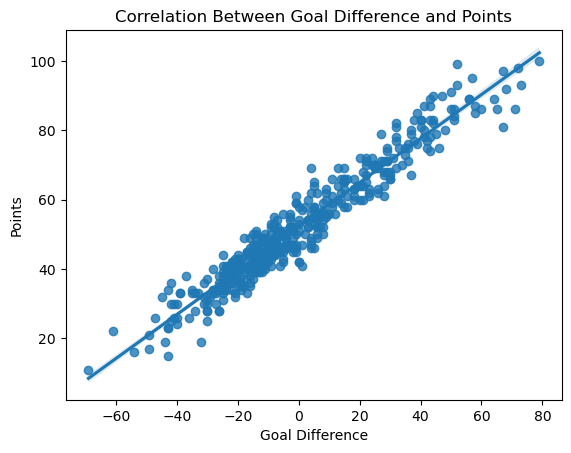

Correlation between Goal Difference and Points: 0.97


In [322]:
## scatterplot with regression line

sns.regplot(x = 'goal_difference', y = 'points', data = df2)
plt.title('Correlation Between Goal Difference and Points')
plt.xlabel('Goal Difference')
plt.ylabel('Points')
plt.show()

## finding correlation between Goal Difference and Points
correlation = df['goal_difference'].corr(df['points'])
print(f"Correlation between Goal Difference and Points: {correlation:.2f}")

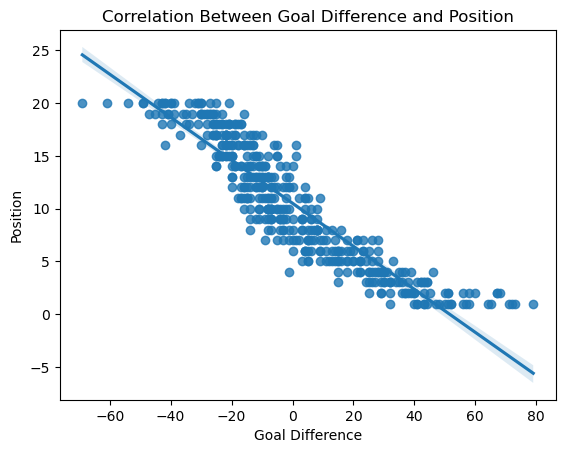

Correlation between Goal Difference and Position: -0.92


In [376]:
## scatterplot with regression line

sns.regplot(x = 'goal_difference', y = 'position', data = df2)
plt.title('Correlation Between Goal Difference and Position')
plt.xlabel('Goal Difference')
plt.ylabel('Position')
plt.show()

## finding correlation between Goal Difference and Points
correlation = df['goal_difference'].corr(df['position'])
print(f"Correlation between Goal Difference and Position: {correlation:.2f}")

Consistently Qualifying Teams:
                   season  position  games_played  wins  draw  losses  \
team                                                                    
Arsenal                16        16            16    16    16      16   
Chelsea                17        17            17    17    17      17   
Liverpool              14        14            14    14    14      14   
Manchester City        12        12            12    12    12      12   
Manchester United      17        17            17    17    17      17   

                   goals_for  goals_against  goal_difference  points  \
team                                                                   
Arsenal                   16             16               16      16   
Chelsea                   17             17               17      17   
Liverpool                 14             14               14      14   
Manchester City           12             12               12      12   
Manchester United        

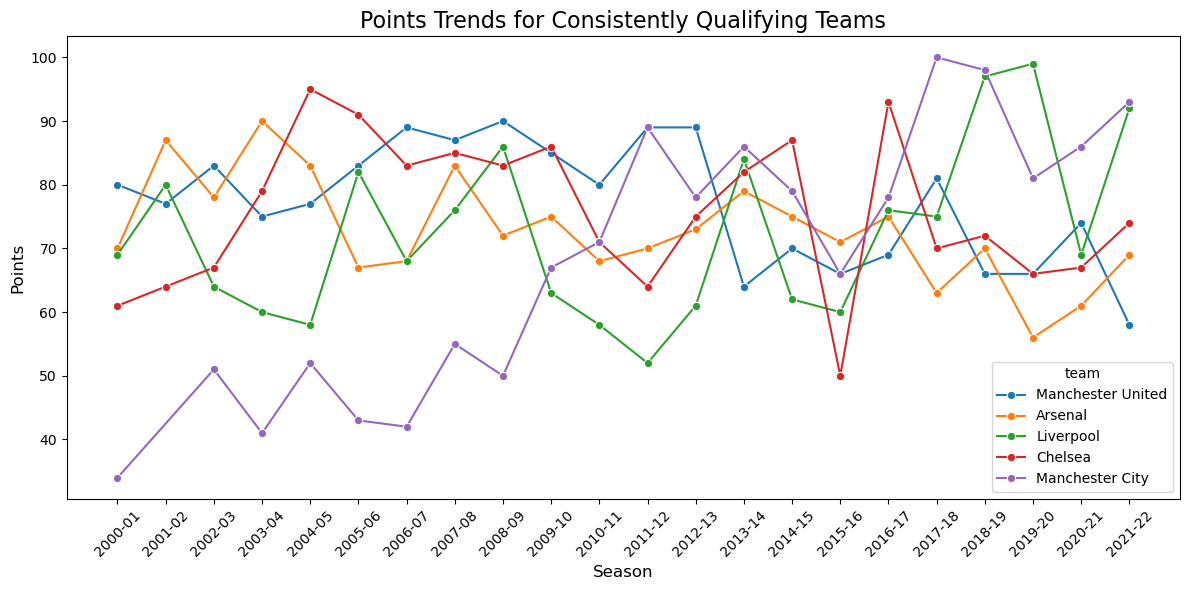

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

# identifies consistently qualifying teams (top 4)
qualifying_teams = df2[df2['position'] <= 4].groupby('team').count()
qualifying_teams = qualifying_teams[qualifying_teams['season'] > 10]  # team who made top 10 > 10

print("Consistently Qualifying Teams:")
print(qualifying_teams)

# Filter data for top teams
top_teams_data = df2[df2['team'].isin(qualifying_teams.index)]

# Seting plot size and style for better readability/visuals
plt.figure(figsize=(12, 6))  # Increase size for better spacing

# distinct color for identifying teams
sns.set_palette("tab10")  

# add markers on the line between different data points for clarity
sns.lineplot(x='season', y='points', hue='team', data=top_teams_data, marker='o')

# Title and labels
plt.title('Points Trends for Consistently Qualifying Teams', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Points', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()  # Ensures everything fits without overlap
plt.show()


Consistently Qualifying Teams:
                   season  position  games_played  wins  draw  losses  \
team                                                                    
Arsenal                16        16            16    16    16      16   
Chelsea                17        17            17    17    17      17   
Liverpool              14        14            14    14    14      14   
Manchester City        12        12            12    12    12      12   
Manchester United      17        17            17    17    17      17   

                   goals_for  goals_against  goal_difference  points  \
team                                                                   
Arsenal                   16             16               16      16   
Chelsea                   17             17               17      17   
Liverpool                 14             14               14      14   
Manchester City           12             12               12      12   
Manchester United        

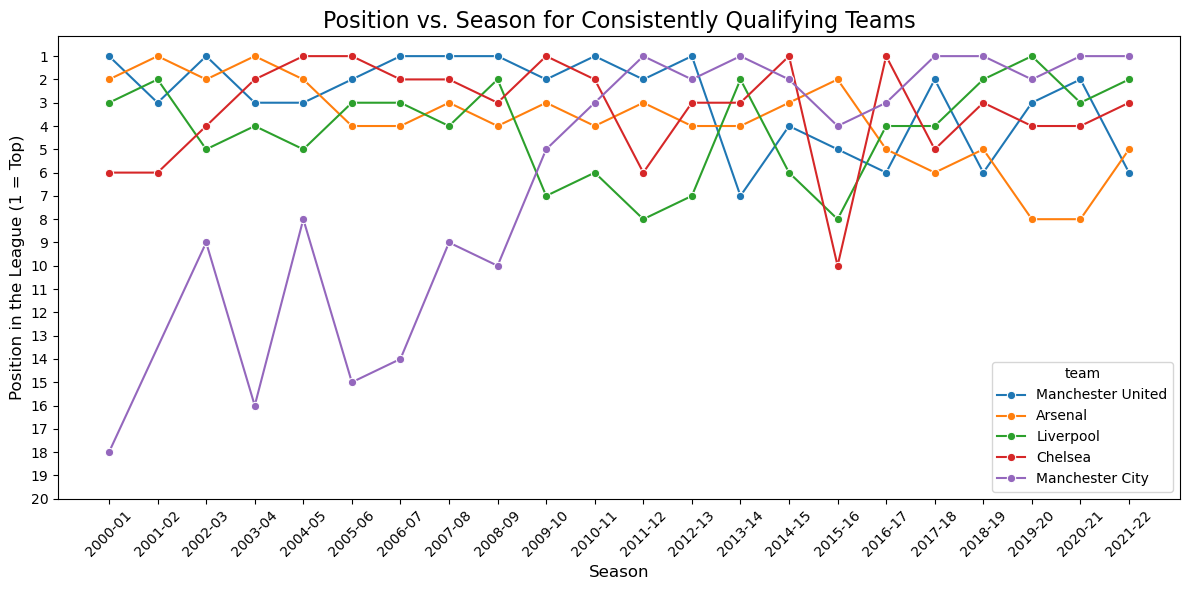

In [370]:
# identifies consistently qualifying teams (top 4)
filtered_teams = df2[df2['position'] <= 4].groupby('team').count()
filtered_teams = filtered_teams[
filtered_teams['season'] > 10]

print("Consistently Qualifying Teams:")
print(filtered_teams)

# Filter data for top teams
top_teams_data = df[df['team'].isin(filtered_teams.index)]
top_teams_data

# Seting plot size and style for better readability/visuals
plt.figure(figsize=(12, 6))  # Increase size for better spacing

# distinct color for identifying teams
sns.set_palette("tab10")  

# add markers on the line between different data points for clarity
sns.lineplot(x='season', y='position', hue='team', data=top_teams_data, marker='o')

# Title and labels
plt.title('Position vs. Season for Consistently Qualifying Teams', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Position in the League (1 = Top)', fontsize=12)

# Invert y-axis to show higher positions (top 1st) at the top of the plot
plt.gca().invert_yaxis()  # Inverts the y-axis for higher positions to appear at the top

# Set y-axis ticks to range from 1 to 20 (league positions)
plt.yticks(range(1, 21))  # Positions 1 to 20

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()  # Ensures everything fits without overlap
plt.show()